1. Bar plot of average points of each country.
2. logistic regression of price and point.
3. box-enhanced plot of points in top3 country('US','France','Italy')
    - distribution of point for each country
4. box-enhanced plot of points in top10 (province/ variety)
    - distribution of point for California
    
 also:
 Scatter plots didn't work very well, so I used box plots instead.

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sl
from database import db_constants
# Inline matplotlib (keep charts in this notebook)
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

read null-cleaned db into pandas df

In [2]:
WINE_INIT_DB_NAME = db_constants.WINE_INIT_DB_NAME
WINE_INIT_PATH_TO_DB = 'database/' + WINE_INIT_DB_NAME
con = sl.connect(WINE_INIT_PATH_TO_DB)
sql_cmd = "SELECT * FROM wine_init"
df = pd.read_sql_query(sql_cmd, con, index_col = 'index')
con.close()

Also, I rule out some rows with extreme prices  
and keep rows with prece less than 1000

In [3]:
df = df[df['price'] <= 1000]

In [4]:
# Mean point of every Country
df_countryMeanPoints = df.groupby("country").agg({'points':'mean'}).sort_values(by = 'points',ascending = False)
df_countryMeanPoints = df_countryMeanPoints.reset_index()

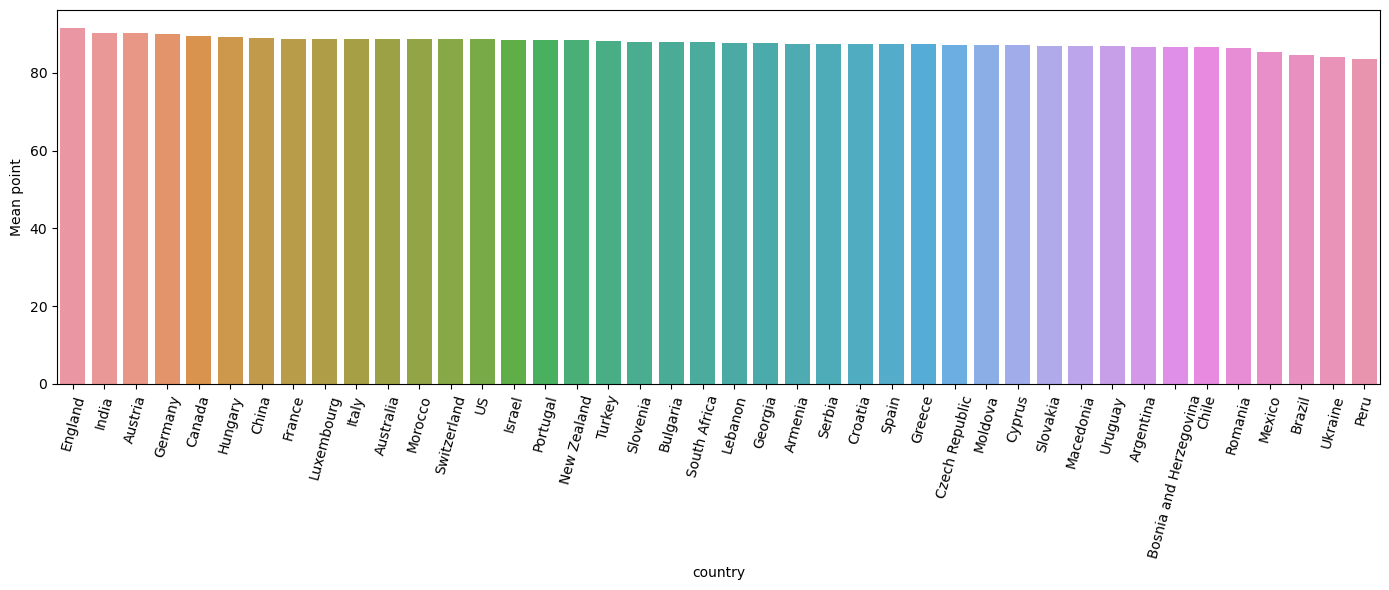

In [5]:
plt.figure(figsize = [14,6])
ax = sns.barplot(x = 'country', y = 'points', data = df_countryMeanPoints)
ax.set_xticklabels(labels = df_countryMeanPoints['country'],rotation = 75);
ax.set_ylabel('Mean point')
plt.tight_layout()

Linear Regression

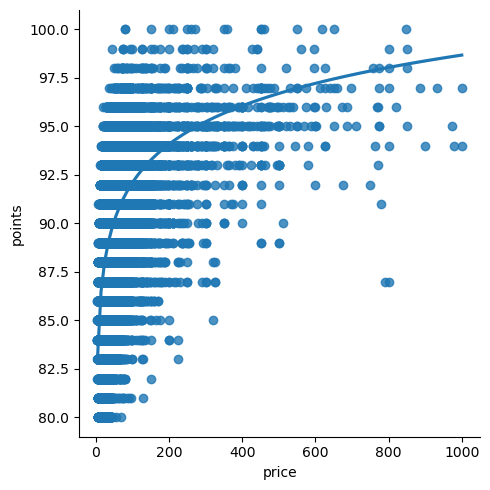

In [6]:
sns.lmplot(x="price",
           y="points",
           data=df,
           logx=True)

Distribution of points in Top 3 Country

In [7]:
df_top3Country = df[df["country"].str.contains("US|France|Italy")==True]

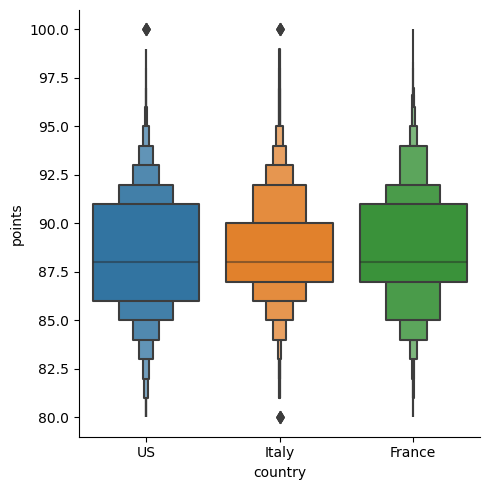

In [8]:
sns.catplot(x="country", y="points",kind='boxen', data=df_top3Country)

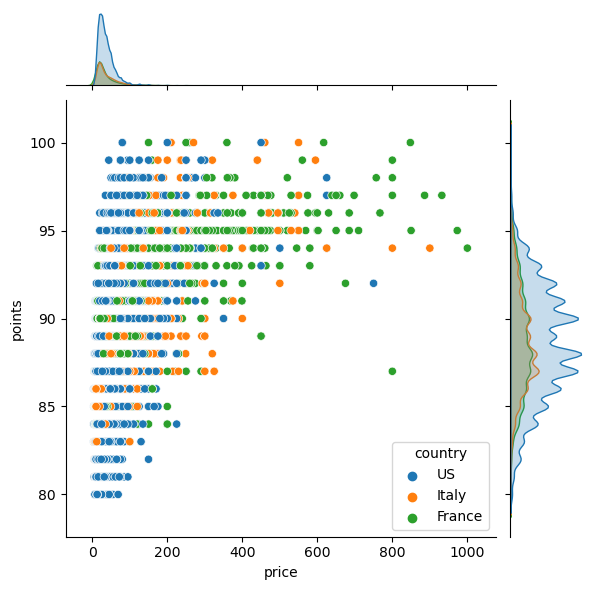

In [9]:
sns.jointplot(x="price", y="points",hue = 'country', data=df_top3Country)

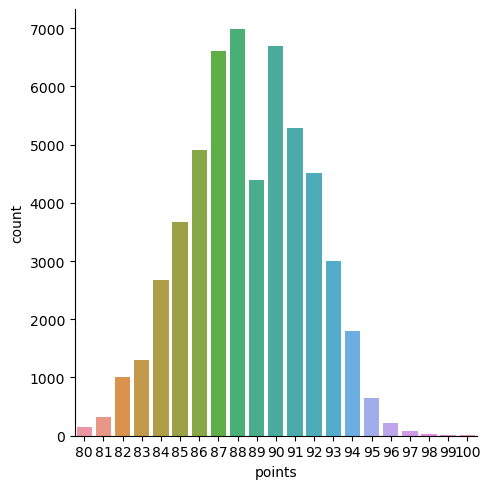

In [10]:
sns.catplot(x="points", kind="count", data=df_top3Country[df_top3Country['country']=='US'])

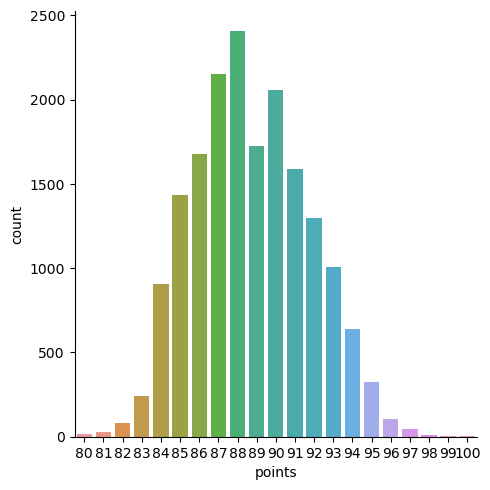

In [11]:
sns.catplot(x="points", kind="count", data=df_top3Country[df_top3Country['country']=='France'])

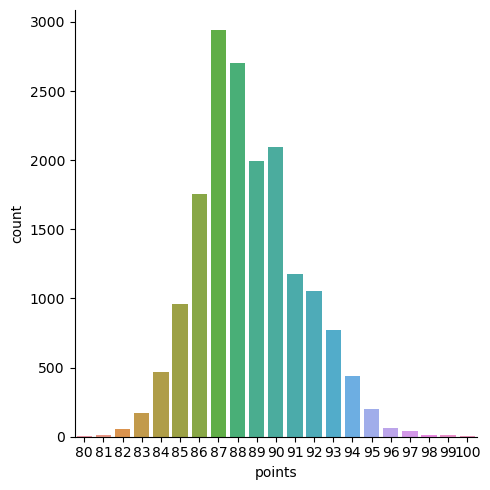

In [12]:
sns.catplot(x="points", kind="count", data=df_top3Country[df_top3Country['country']=='Italy'])

In [13]:
df['province'].value_counts(normalize = True).index

Index(['California', 'Washington', 'Oregon', 'Tuscany', 'Bordeaux',
       'Northern Spain', 'Mendoza Province', 'Burgundy', 'Piedmont',
       'New York',
       ...
       'Dolenjska', 'Hrvatsko Primorje', 'Vinho da Mesa', 'Rhode Island',
       'Dingač', 'Pocerina', 'Vlootenburg', 'Ticino', 'Lemesos', 'Neuchâtel'],
      dtype='object', length=422)

The point distribution of wines in California

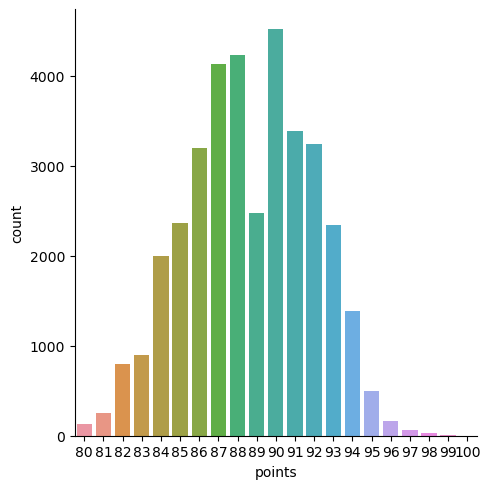

In [14]:
sns.catplot(x="points", kind="count", data=df[df['province']=='California'])

<AxesSubplot:xlabel='points', ylabel='Density'>

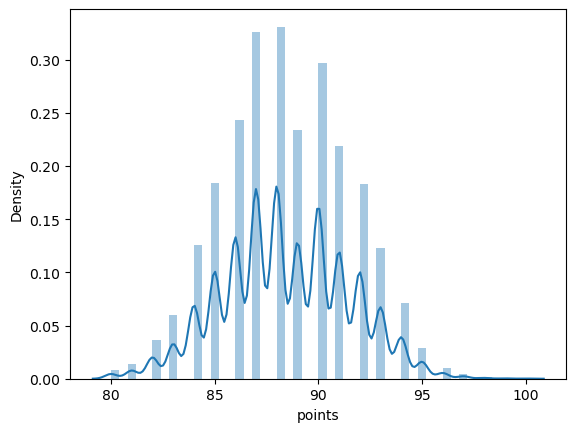

In [15]:
sns.distplot(df['points'])

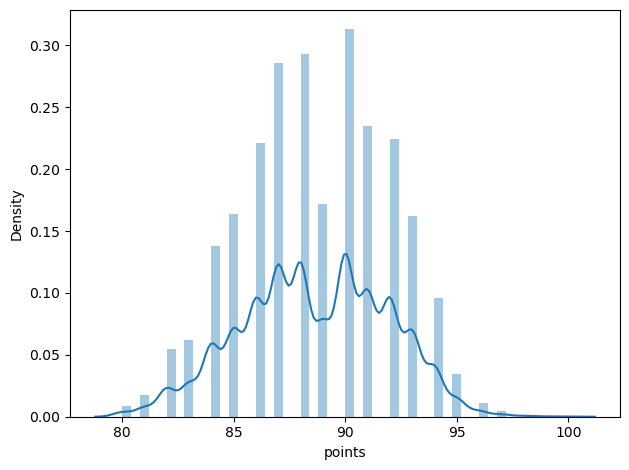

In [16]:
plt.figure()
sns.distplot(df[df['province']=='California']['points'])
plt.tight_layout()

In [17]:
top10Province = df['province'].value_counts(normalize = True).head(10).index.tolist()

In [18]:
df_top10Province = df.loc[df['province'].isin(top10Province)]

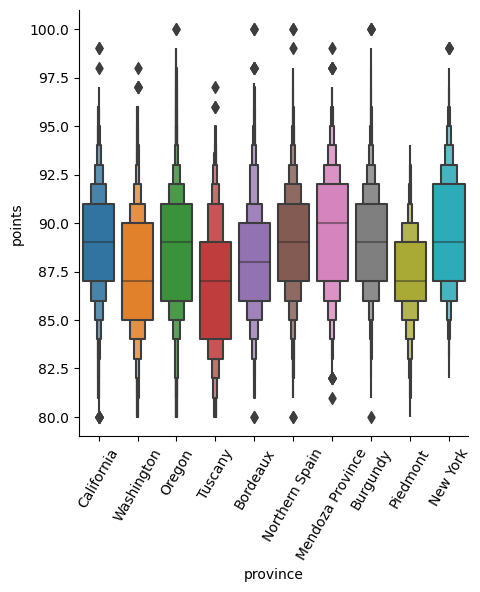

In [19]:
ax = sns.catplot(x="province", y="points",kind = 'boxen', data=df_top10Province)
ax.set_xticklabels(labels = top10Province, rotation = 60);

In [20]:
df['variety'].value_counts(normalize = True).head(10).index

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'Rosé', 'Merlot'],
      dtype='object')

In [21]:
top10Variety = df['variety'].value_counts(normalize = True).head(10).index.tolist()

In [22]:
df_top10Variety = df.loc[df['variety'].isin(top10Variety)]

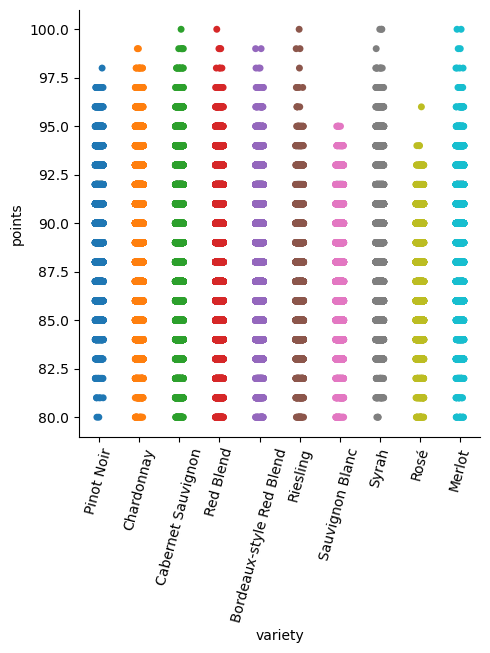

In [23]:
ax = sns.catplot(x="variety", y="points",data=df_top10Variety)
ax.set_xticklabels(labels = top10Variety, rotation = 75);

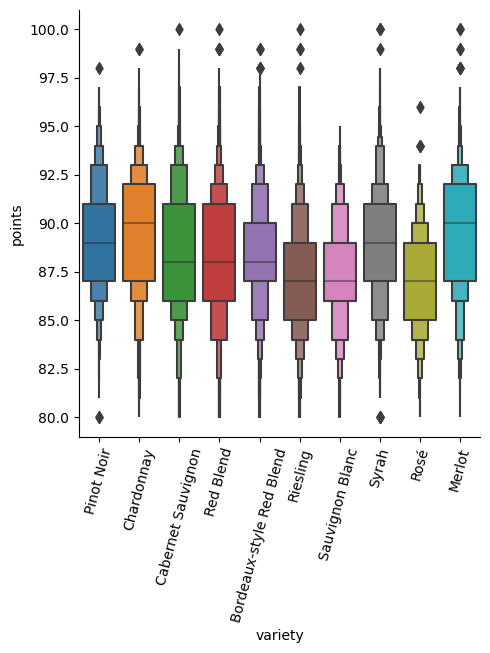

In [24]:
ax = sns.catplot(x="variety", y="points",kind = 'boxen', data=df_top10Variety)
ax.set_xticklabels(labels = top10Variety, rotation = 75);

In [25]:
df['winery'].value_counts(normalize = True)

Testarossa                  0.001795
Williams Selyem             0.001745
Wines & Winemakers          0.001729
DFJ Vinhos                  0.001729
Chateau Ste. Michelle       0.001596
                              ...   
Vin Roc                     0.000008
Fort Ross Vineyard          0.000008
Cosme Palacio y Hermanos    0.000008
Land of Hope                0.000008
Penedo Borges               0.000008
Name: winery, Length: 15841, dtype: float64